<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>

# <center>Régression linéaire simple</center>


#### À propos de ce bloc-notes
Dans ce cahier, nous apprenons à utiliser R pour implémenter une régression linéaire simple. Nous téléchargeons un ensemble de données lié à la consommation de carburant et aux émissions de dioxyde de carbone des voitures. Ensuite, nous divisons nos données en ensembles d'entraînement et de test, créons un modèle à l'aide d'un ensemble d'entraînement, évaluons notre modèle à l'aide d'un ensemble de test et enfin utilisons le modèle pour prédire une valeur inconnue.

### Téléchargement des données
Pour télécharger les données, nous utiliserons l'adesse Web: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
ensuite nous metterons le fichier téléchargé dans jupyter localhost.

## Comprendre les données

### `FuelConsumptionCo2.csv`:
Nous avons téléchargé un ensemble de données sur la consommation de carburant, **`«FuelConsumption.csv»`**, qui contient les cotes de consommation de carburant propres au modèle et les émissions de dioxyde de carbone estimées pour les véhicules légers neufs vendus au détail au Canada. [Source de données](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)
- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

## Lire les données

In [91]:
Co2Cons <- read.csv(file = 'FuelConsumptionCo2.csv')
head(Co2Cons)

MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230


### Exploration des données
Commençons par une exploration descriptive de nos données.

In [92]:
summary(Co2Cons)

   MODELYEAR               MAKE              MODEL              VEHICLECLASS
 Min.   :2014   FORD         : 90   F150 FFV    :   8   MID-SIZE      :178  
 1st Qu.:2014   CHEVROLET    : 86   F150 FFV 4X4:   8   COMPACT       :172  
 Median :2014   BMW          : 64   ACCORD      :   6   SUV - SMALL   :154  
 Mean   :2014   MERCEDES-BENZ: 59   BEETLE      :   6   SUV - STANDARD:110  
 3rd Qu.:2014   AUDI         : 49   FOCUS FFV   :   6   FULL-SIZE     : 86  
 Max.   :2014   GMC          : 49   MUSTANG     :   5   TWO-SEATER    : 71  
                (Other)      :670   (Other)     :1028   (Other)       :296  
   ENGINESIZE      CYLINDERS       TRANSMISSION FUELTYPE FUELCONSUMPTION_CITY
 Min.   :1.000   Min.   : 3.000   A6     :222   D: 27    Min.   : 4.60       
 1st Qu.:2.000   1st Qu.: 4.000   AS6    :189   E: 92    1st Qu.:10.25       
 Median :3.400   Median : 6.000   M6     :141   X:514    Median :12.60       
 Mean   :3.346   Mean   : 5.795   A8     : 87   Z:434    Mean   :13.30  

Sélectionons certaines fonctionnalités pour en explorer davantage.

In [93]:
cCo2Cons = Co2Cons[c('ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS')]
head(cCo2Cons)

ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
2.0,4,8.5,196
2.4,4,9.6,221
1.5,4,5.9,136
3.5,6,11.1,255
3.5,6,10.6,244
3.5,6,10.0,230


In [94]:
if("ggplot2" %in% rownames(installed.packages()) == FALSE) {install.packages("ggplot2")}
library(ggplot2)

In [95]:
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

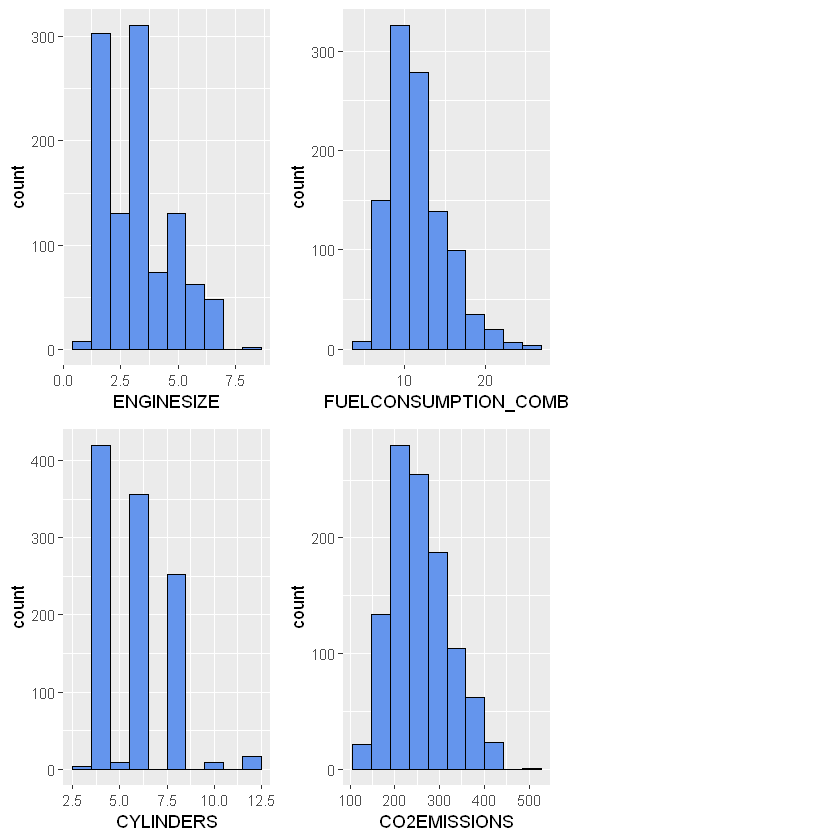

In [96]:
myplots <- list()  # new empty list
for(i in 1:ncol(cCo2Cons)){
  col <- names(cCo2Cons)[i]
  ggp <- ggplot(cCo2Cons, aes_string(x = col)) +
    geom_histogram(bins = 10, fill = "cornflowerblue", color = "black") 
#    geom_vline(xintercept = mean(mtcars[[col]]), col = "red", lwd=1.5) 
  myplots[[i]] <- ggp  # add each plot into plot list
}

multiplot(plotlist = myplots, cols = 3)

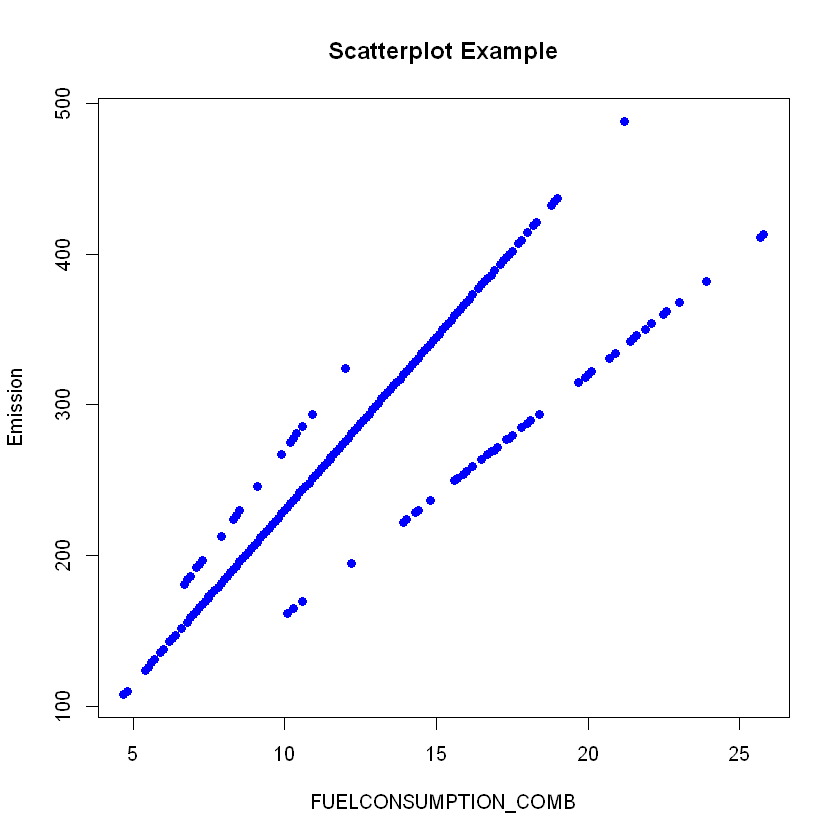

In [97]:
plot(cCo2Cons$FUELCONSUMPTION_COMB, cCo2Cons$CO2EMISSIONS, main="Scatterplot Example",xlab="FUELCONSUMPTION_COMB", 
     ylab="Emission", pch=19, col="blue")

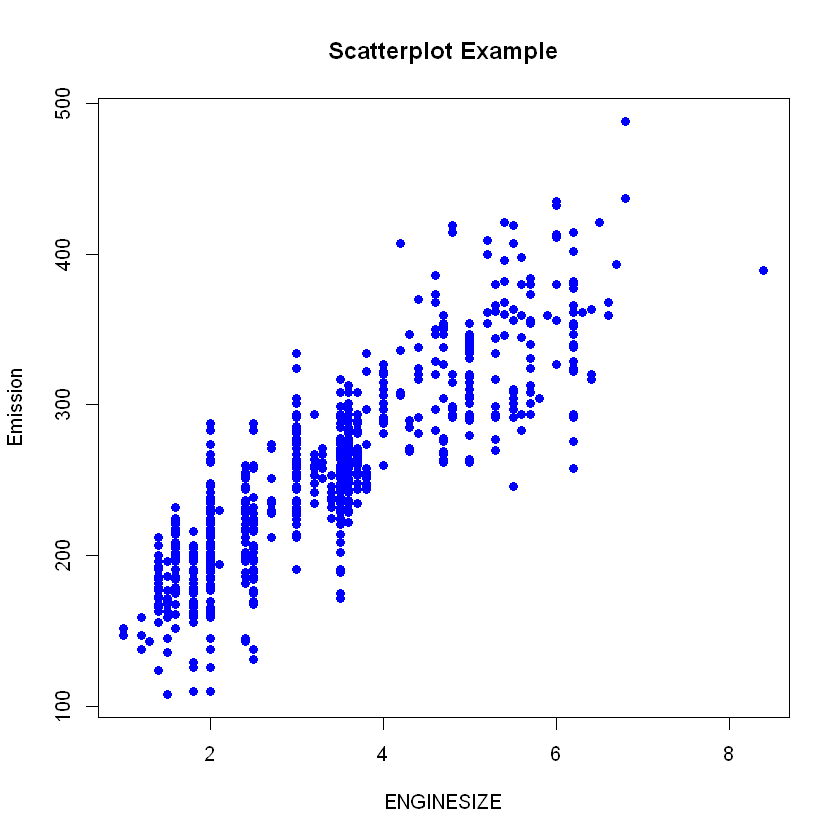

In [98]:
plot(cCo2Cons$ENGINESIZE, cCo2Cons$CO2EMISSIONS, main="Scatterplot Example",xlab="ENGINESIZE", 
     ylab="Emission", pch=19, col="blue")

## S'entraîner
Tracez __CYLINDER__ vs l'émission, pour voir à quel point leur relation est linéaire :

In [ ]:
# écrivez votre code ici

Double-cliquez __ici__ pour voir la solution.

<!-- Your answer is below:
    
plot(cCo2Cons$CYLINDERS, cCo2Cons$CO2EMISSIONS, main="Scatterplot Example",xlab="ENGINESIZE", 
     ylab="Emission", pch=19, col="blue")

-->

#### Création d'un ensemble de données de train et de test
Train / Test Split implique la division de l'ensemble de données en ensembles d'apprentissage et de test respectivement, qui sont mutuellement exclusifs. Après quoi, vous vous entraînez avec l'ensemble d'entraînement et testez avec l'ensemble de test.
Cela fournira une évaluation plus précise de la précision hors échantillon, car l'ensemble de données de test ne fait pas partie de l'ensemble de données qui a été utilisé pour entraîner les données. C'est plus réaliste pour les problèmes du monde réel.

Cela signifie que nous connaissons le résultat de chaque point dans cet ensemble de données, ce qui en fait un excellent test! Et comme ces données n'ont pas été utilisées pour entraîner le modèle, le modèle n'a aucune connaissance du résultat de ces points de données. Donc, en substance, il s'agit vraiment d'un test hors échantillon.

In [99]:
dt = sort(sample(nrow(cCo2Cons), nrow(cCo2Cons)*.8))
train<-cCo2Cons[dt,]
test<-cCo2Cons[-dt,]

### Modèle de régression simple
La régression linéaire ajuste un modèle linéaire avec des coefficients B = (B1, ..., Bn) pour minimiser la `` somme résiduelle des carrés '' entre la variable indépendante x dans l'ensemble de données et la variable dépendante y par l'approximation linéaire.

#### Distribution des données d'entrainement

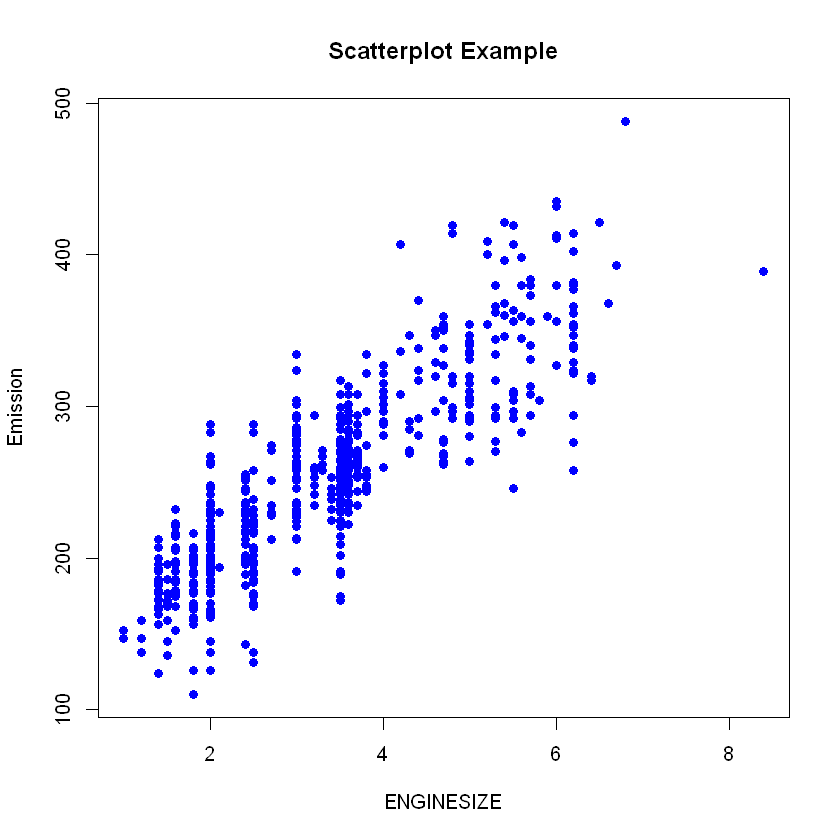

In [126]:
plot(train$ENGINESIZE, train$CO2EMISSIONS, main="Scatterplot Example",xlab="ENGINESIZE", 
     ylab="Emission", pch=19, col="blue")

#### La modélisation
Utilisation de la fonction lm pour modéliser les données.

In [101]:
x <- train$ENGINESIZE
y <- train$CO2EMISSIONS
model<-lm(y ~ x, data = train)
model


Call:
lm(formula = y ~ x, data = train)

Coefficients:
(Intercept)            x  
     125.40        39.14  


Comme mentionné précédemment, __Coefficient__ et __Intercepte__ dans la régression linéaire simple, sont les paramètres de la ligne d'ajustement.
Étant donné qu'il s'agit d'une régression linéaire simple, avec seulement 2 paramètres, et sachant que les paramètres sont l'intercepte et la pente de la droite, lm peut les estimer directement à partir de nos données.
Notez que toutes les données doivent être disponibles pour parcourir et calculer les paramètres.

#### Tracer les sorties
Nous pouvons tracer la ligne d'ajustement dans le même graphe représentant les données:

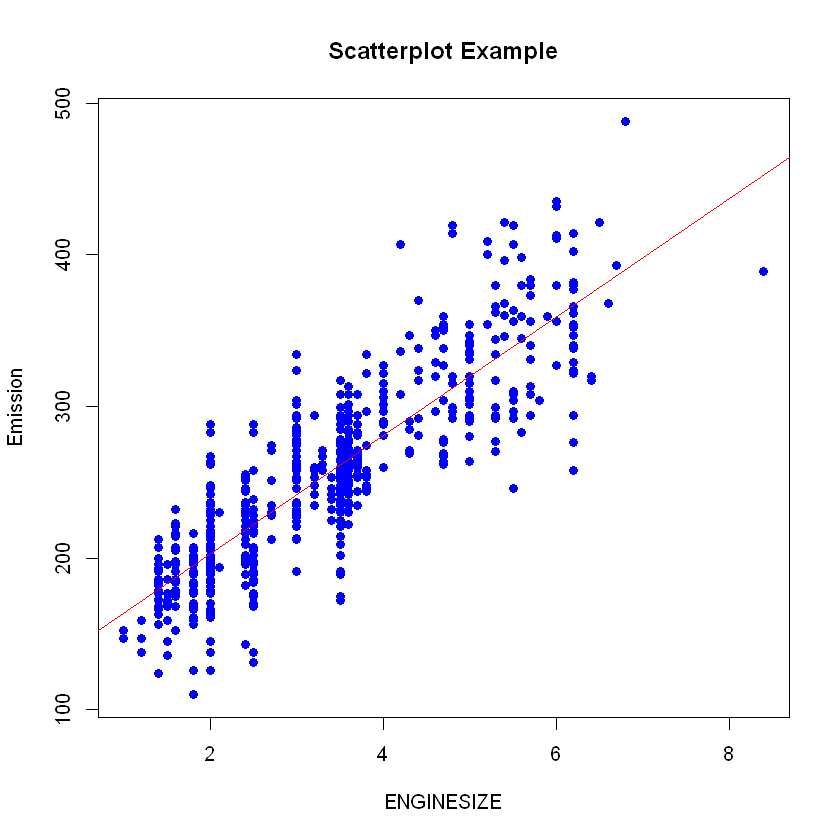

In [125]:
plot(train$ENGINESIZE, train$CO2EMISSIONS, main="Scatterplot Example",xlab="ENGINESIZE", 
     ylab="Emission", pch=19, col="blue")
abline(lm(y ~ x, data = train), col = "red")

#### Évaluation
Nous comparons les valeurs réelles et les valeurs prédites pour calculer la précision d'un modèle de régression. Les mesures d'évaluation jouent un rôle clé dans le développement d'un modèle, car elles fournissent un aperçu sur des domaines qui nécessitent des améliorations.

Il existe différentes métriques d'évaluation du modèle, utilisons ici MSE pour calculer la précision de notre modèle en fonction de l'ensemble de test:
    - Erreur absolue moyenne: C'est la moyenne de la valeur absolue des erreurs. Il s'agit de la mesure la plus simple à comprendre, car il ne s'agit que d'une erreur moyenne.
    - Erreur quadratique moyenne (MSE): l'erreur quadratique moyenne (MSE) est la moyenne de l'erreur quadratique. elle est plus populaire que l’erreur absolue moyenne, car l’accent est davantage mis sur les erreurs importantes. Cela est dû au fait que le terme carré augmente de manière exponentielle les erreurs les plus importantes par rapport aux plus petites.
    - Erreur quadratique moyenne (RMSE).
    - Le R au carré n'est pas une erreur, mais c'est une métrique populaire pour la précision de votre modèle. Il représente la proximité des données par rapport à la droite de régression ajustée. Plus le R au carré est élevé, plus le modèle s'adapte à vos données. Le meilleur score possible est de 1,0 et il peut être négatif (car le modèle peut être arbitrairement pire).

In [129]:
M.lm=lm(CO2EMISSIONS~ENGINESIZE,data=test)
summary(M.lm)$r.squared

[1] 0.7625078

In [137]:
predicted=predict(model, newdata = test)
original <- test$CO2EMISSIONS
d = original-predicted
mse = mean((d)^2)
mae = mean(abs(d))
rmse = sqrt(mse)
R2 = 1-(sum((d)^2)/sum((original-mean(original))^2))

In [138]:
cat(" MAE:", mae, "\n", "MSE:", mse, "\n", 
    "RMSE:", rmse, "\n", "R-squared:", R2)

 MAE: 22.70658 
 MSE: 926.1877 
 RMSE: 30.43333 
 R-squared: 0.7623336